In [26]:
# beer dataset
import pandas as pd
beer = pd.read_csv('./datasets/data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [27]:
X = beer[["calories", "sodium", "alcohol", "cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [28]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=2).fit(X)
km3 = KMeans(n_clusters=3).fit(X)
beer['cluster2'] = km2.labels_
beer['cluster3'] = km3.labels_
beer.sort_values('cluster2')

,name,calories,sodium,alcohol,cost,cluster2,cluster3
9,Budweiser_Light,113,8,3.7,0.40,0,2
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
11,Coors_Light,102,15,4.1,0.46,0,2
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
8,Miller_Lite,99,10,4.3,0.43,0,2
19,Schlitz_Light,97,7,4.2,0.47,0,2
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
4,Heineken,152,11,5.0,0.77,1,1
3,Kronenbourg,170,7,5.2,0.73,1,1


In [29]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,1.000000


In [30]:
beer.groupby("cluster3").mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,70.00,10.5,2.600000,0.420000,0.0
1,150.00,17.0,4.521429,0.520714,1.0
2,102.75,10.0,4.075000,0.440000,0.0


Text(0.5, 0.92, 'With 3 centroids initialized')

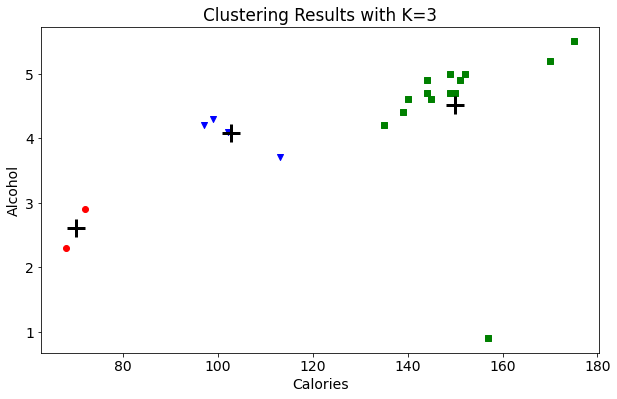

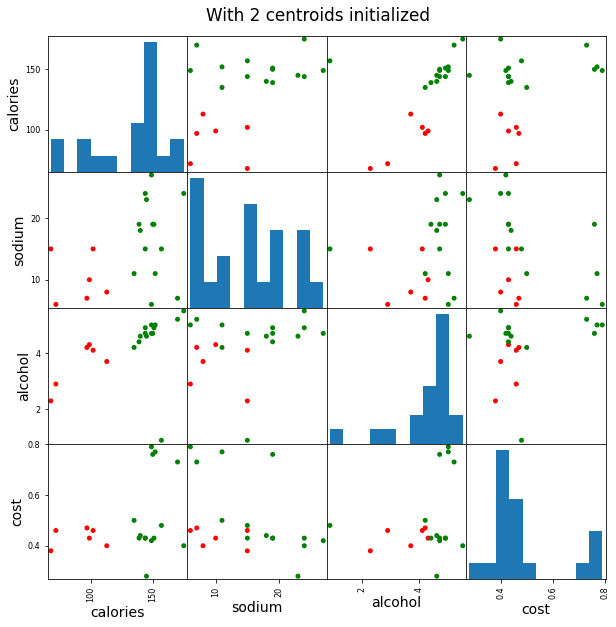

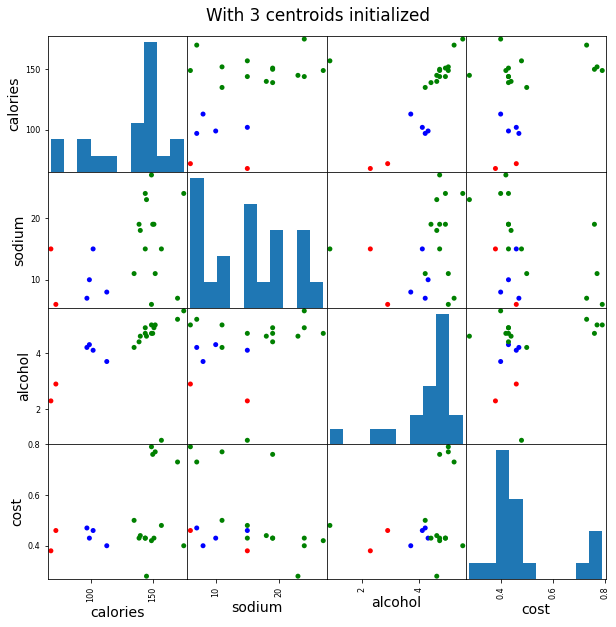

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

#plotting clustering results with K=3 axies by Caloires*Alcohol
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
centers = beer.groupby('cluster3').mean().reset_index()
colors = np.array(['red', 'green', 'blue', 'yellow'])
markers = np.array(['o', ',', 'v','^'])
for x,y,cr,mr in zip(beer["calories"],beer["alcohol"],colors[beer["cluster3"]],markers[beer["cluster3"]]):
    plt.scatter(x, y, c=cr, marker=mr)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("Calories")
plt.ylabel("Alcohol")
plt.title("Clustering Results with K=3")

#scatter matrix with K=2
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized",x=0.5,y=0.92)

#scatter matrix with K=3
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized",x=0.5,y=0.92)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.38791334  0.00779468  0.43380786 -0.45682969]
 [ 0.6250656   0.63136906  0.62241997 -0.45682969]
 [ 0.82833896  0.00779468 -3.14982226 -0.10269815]
 [ 1.26876459 -1.23935408  0.90533814  1.66795955]
 [ 0.65894449 -0.6157797   0.71672602  1.95126478]
 [ 0.42179223  1.25494344  0.3395018  -1.5192243 ]
 [ 1.43815906  1.41083704  1.1882563  -0.66930861]
 [ 0.55730781  1.87851782  0.43380786 -0.52765599]
 [-1.1366369  -0.7716733   0.05658363 -0.45682969]
 [-0.66233238 -1.08346049 -0.5092527  -0.66930861]
 [ 0.25239776  0.47547547  0.3395018  -0.38600338]
 [-1.03500022  0.00779468 -0.13202848 -0.24435076]
 [ 0.08300329 -0.6157797  -0.03772242  0.03895447]
 [ 0.59118671  0.63136906  0.43380786  1.88043848]
 [ 0.55730781 -1.39524768  0.71672602  2.0929174 ]
 [-2.18688263  0.00779468 -1.82953748 -0.81096123]
 [ 0.21851887  0.63136906  0.15088969 -0.45682969]
 [ 0.38791334  1.41083704  0.62241997 -0.45682969]
 [-2.05136705 -1.39524768 -1.26370115 -0.24435076]
 [-1.20439469 -1.23935408 -0.03

In [33]:
km = KMeans(n_clusters=3).fit(X_scaled)
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster2,cluster3,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,0,2,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0,0
12,Michelob_Light,135,11,4.2,0.50,1,1,0
11,Coors_Light,102,15,4.1,0.46,0,2,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0,0
8,Miller_Lite,99,10,4.3,0.43,0,2,0
19,Schlitz_Light,97,7,4.2,0.47,0,2,0
2,Lowenbrau,157,15,0.9,0.48,1,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1,1


array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='alcohol', ylabel='calories'>,
        <AxesSubplot:xlabel='cost', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='alcohol', ylabel='sodium'>,
        <AxesSubplot:xlabel='cost', ylabel='sodium'>],
       [<AxesSubplot:xlabel='calories', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sodium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='cost', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='calories', ylabel='cost'>,
        <AxesSubplot:xlabel='sodium', ylabel='cost'>,
        <AxesSubplot:xlabel='alcohol', ylabel='cost'>,
        <AxesSubplot:xlabel='cost', ylabel='cost'>]], dtype=object)

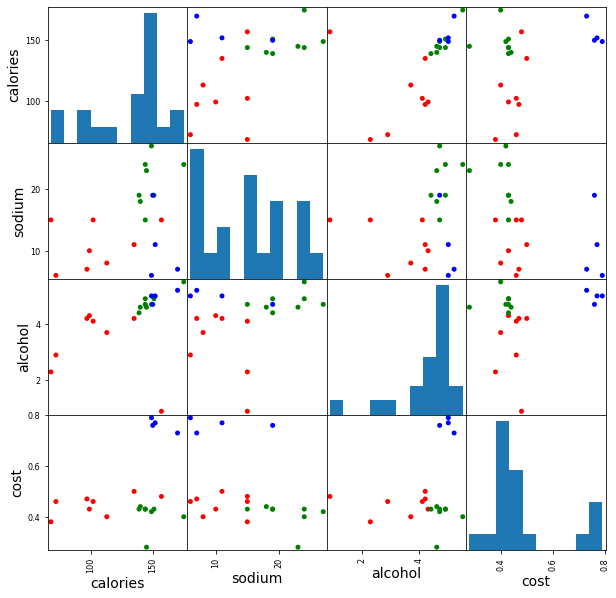

In [34]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

In [35]:
from sklearn import metrics
score_scale = metrics.silhouette_score(X, beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster3)
print(score_scale, score)

0.1797806808940007 0.6731775046455796


In [36]:
scores = []
for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)
scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.4081599013899603,
 0.3413109618039333,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0, 0.5, 'Sihouette Score')

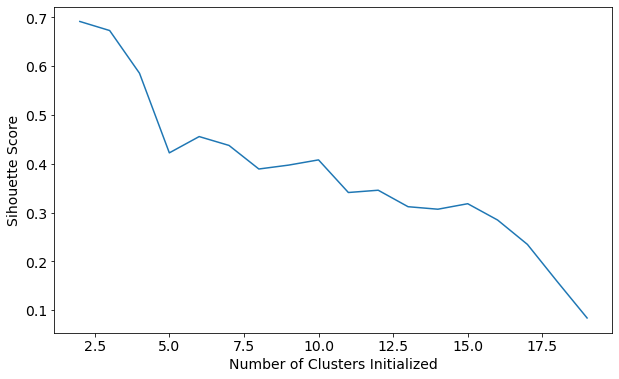

In [37]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

In [13]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)
labels = db.labels_
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

AttributeError: 'DBSCAN' object has no attribute 'fix'